Data preprocessing

1. Use the code given in listing 1 to generate data. Please use your index number for
data generation

2. Plot the generated data (signal).

<StemContainer object of 3 artists>

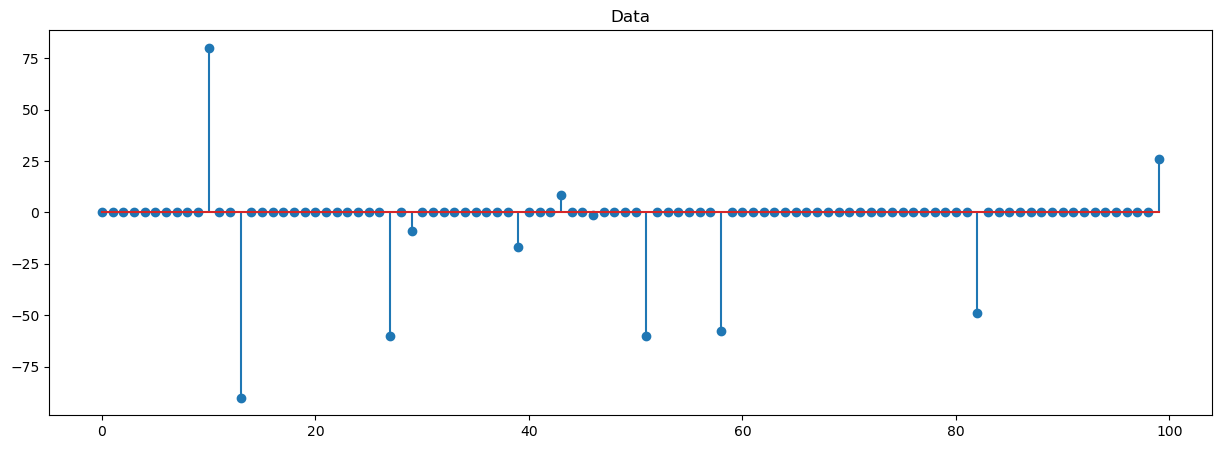

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):
    
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 50*np.random.randn(num_nonzero)  
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100  # Total length of the signal
num_nonzero = 10    # Number of non-zero elements in the signal
your_index_no=200377 # Enter without english letter and without leading zeros
signal = generate_signal(signal_length, num_nonzero)
signal[10] = (your_index_no % 10)*10 + 10
if  your_index_no % 10 == 0:
  signal[10] = np.random.randn(1) + 30


signal=signal.reshape(signal_length,1)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data")
plt.stem(signal)


3.Apply following normalization methods

 MaxAbsScaler (preprocessing.MaxAbsScaler() from sklearn.preprocessing)

In [3]:

# Assuming 'data' is your 1D array
data = np.array([1, 2, 3, 4, 5])

# Display as a row matrix
print(data.reshape(1, -1))

# Display as a column matrix
print(data.reshape(-1, 1))

[[1 2 3 4 5]]
[[1]
 [2]
 [3]
 [4]
 [5]]


In [5]:
import numpy as np
from sklearn.preprocessing import MaxAbsScaler

# Reshape the signal to a 2D array
signal = signal.reshape(-1, 1)

# MaxAbsScaler
max_abs_scaler = MaxAbsScaler()
signal_max_abs_scaled = max_abs_scaler.fit_transform(signal)



 Implement min-max

In [6]:
# Min-Max Scaling
def min_max_scale(data):
    min_val = np.min(data)
    max_val = np.max(data)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

signal_min_max_scaled = min_max_scale(signal)



• Implement  standard normalization

In [7]:

# Standardization Scaling (Z-score normalization)
def z_score_normalize(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    scaled_data = (data - mean) / std_dev
    return scaled_data

signal_z_score_scaled = z_score_normalize(signal)


4.Visualize the data before and after normalization. Create stem plots of the original
and normalized data to visualize the effects of each normalization method on the
data.

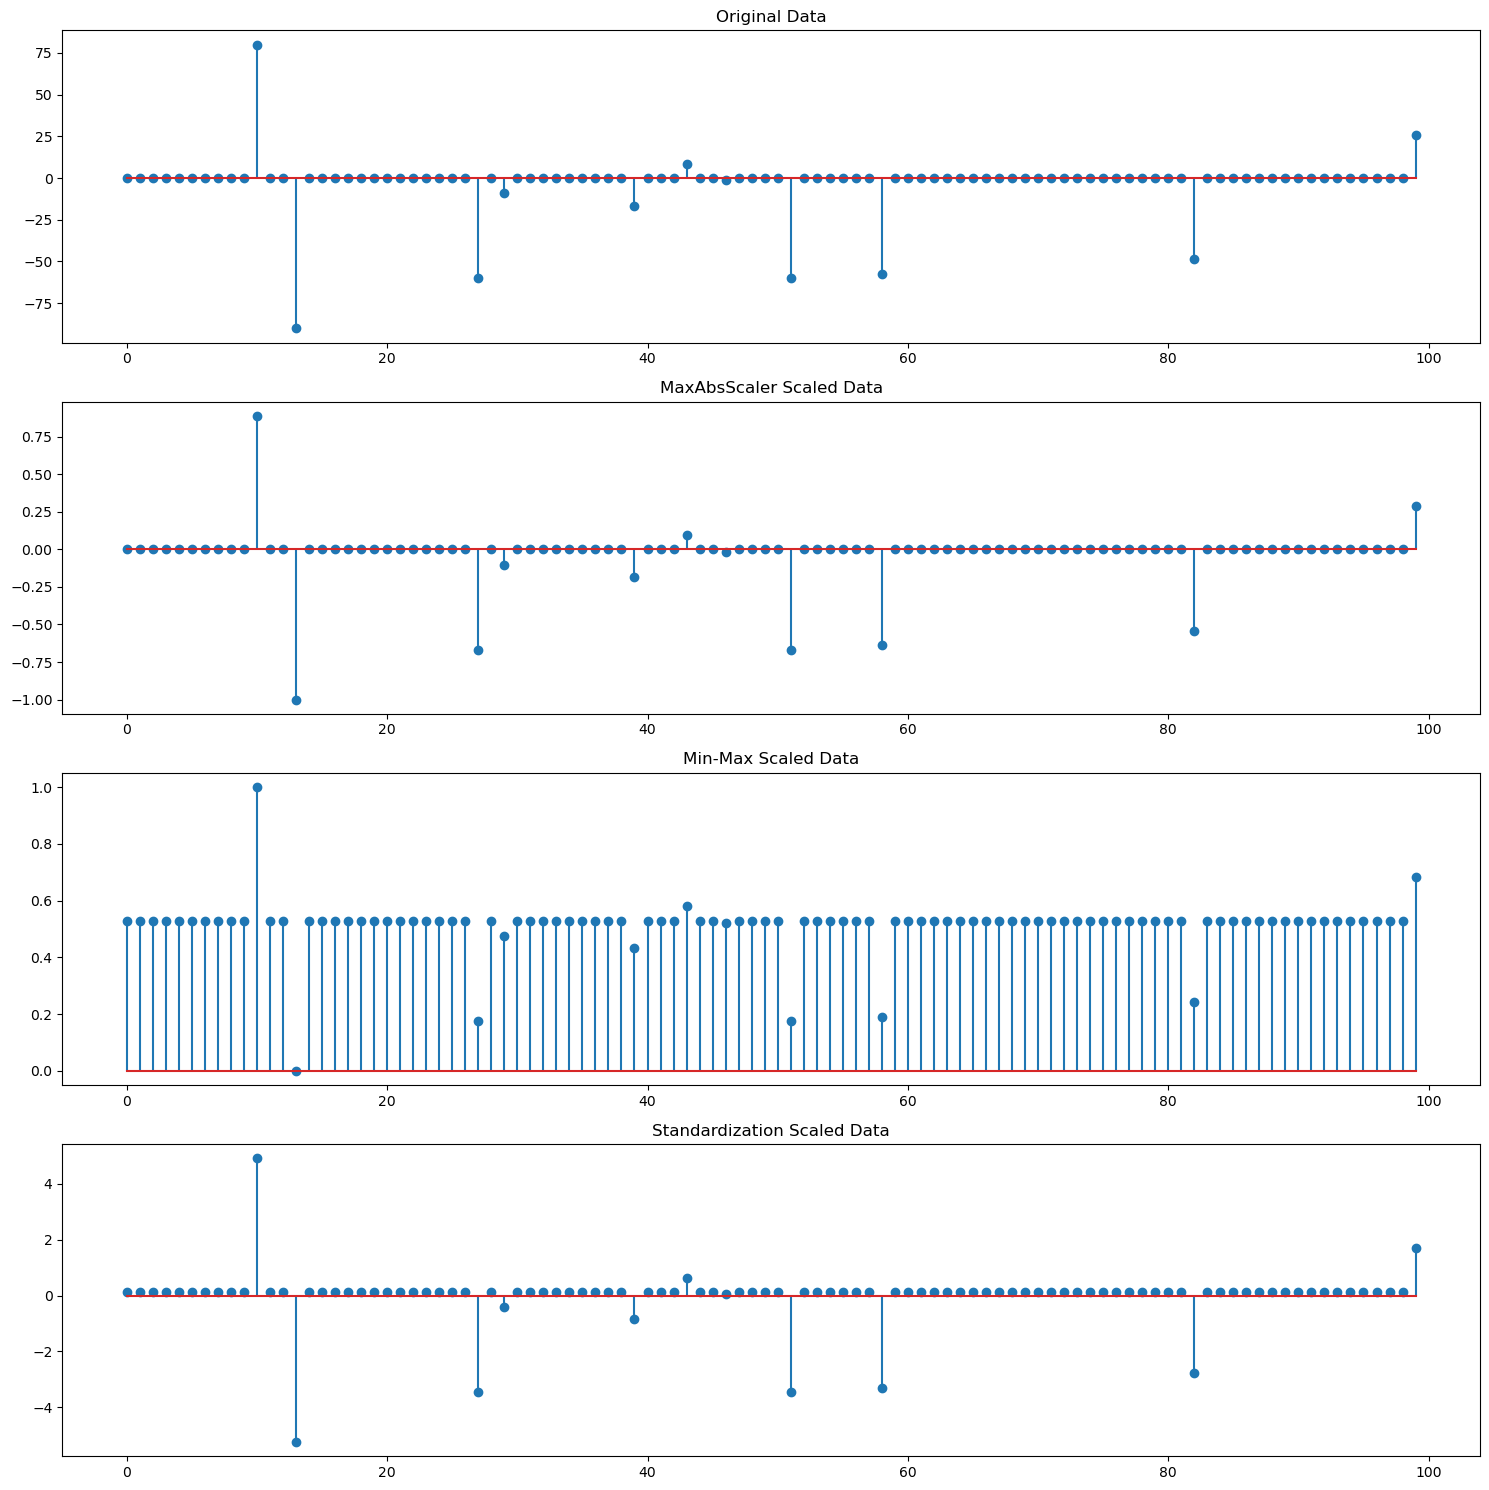

In [8]:
# Create stem plots to visualize the data
plt.figure(figsize=(15, 15))

plt.subplot(4, 1, 1)
plt.title("Original Data")
plt.stem(signal)

plt.subplot(4, 1, 2)
plt.title("MaxAbsScaler Scaled Data")
plt.stem(signal_max_abs_scaled)

plt.subplot(4, 1, 3)
plt.title("Min-Max Scaled Data")
plt.stem(signal_min_max_scaled)

plt.subplot(4, 1, 4)
plt.title("Standardization Scaled Data")
plt.stem(signal_z_score_scaled)

plt.tight_layout()
plt.show()

5.How many none-zero elements in the data before the normalization and after the
normalization.


In [9]:
# Count non-zero elements in the original data
num_nonzero_original = np.count_nonzero(signal)

# Count non-zero elements in each normalized version
num_nonzero_max_abs_scaled = np.count_nonzero(signal_max_abs_scaled)
num_nonzero_min_max_scaled = np.count_nonzero(signal_min_max_scaled)
num_nonzero_z_score_scaled = np.count_nonzero(signal_z_score_scaled)

# Print the results
print("Number of non-zero elements in the original data:", num_nonzero_original)
print("Number of non-zero elements after MaxAbsScaler scaling:", num_nonzero_max_abs_scaled)
print("Number of non-zero elements after Min-Max scaling:", num_nonzero_min_max_scaled)
print("Number of non-zero elements after Standardization scaling normalization:", num_nonzero_z_score_scaled)

Number of non-zero elements in the original data: 11
Number of non-zero elements after MaxAbsScaler scaling: 11
Number of non-zero elements after Min-Max scaling: 99
Number of non-zero elements after Standardization scaling  normalization: 100


 6.Compare how each normalization method scales the data and its impact on structure
of the data.


We will consider the following aspects for comparison:

Statistical properties:

Mean (average)
Standard Deviation (spread)
Range (min and max values)
Visualizations:

Histograms of the data distribution
Stem plots to visualize the data structure

In [12]:
# Calculate statistical properties
stats_original = {
    "Mean": np.mean(signal),
    "Std Deviation": np.std(signal),
    "Min": np.min(signal),
    "Max": np.max(signal),
}

stats_max_abs_scaled = {
    "Mean": np.mean(signal_max_abs_scaled),
    "Std Deviation": np.std(signal_max_abs_scaled),
    "Min": np.min(signal_max_abs_scaled),
    "Max": np.max(signal_max_abs_scaled),
}

stats_min_max_scaled = {
    "Mean": np.mean(signal_min_max_scaled),
    "Std Deviation": np.std(signal_min_max_scaled),
    "Min": np.min(signal_min_max_scaled),
    "Max": np.max(signal_min_max_scaled),
}

stats_z_score_scaled = {
    "Mean": np.mean(signal_z_score_scaled),
    "Std Deviation": np.std(signal_z_score_scaled),
    "Min": np.min(signal_z_score_scaled),
    "Max": np.max(signal_z_score_scaled),
}

# Display statistical properties
print("Statistical Properties Comparison:")
print("Original Data:")
print(stats_original)
print("\nMaxAbsScaler Scaled Data:")
print(stats_max_abs_scaled)
print("\nMin-Max Scaled Data:")
print(stats_min_max_scaled)
print("\nStandardization scaling  Scaled Data:")
print(stats_z_score_scaled)

Statistical Properties Comparison:
Original Data:
{'Mean': -2.294432171954501, 'Std Deviation': 16.74206762523334, 'Min': -90.09716546019668, 'Max': 80.0}

MaxAbsScaler Scaled Data:
{'Mean': -0.02546619707995297, 'Std Deviation': 0.18582235678246375, 'Min': -1.0, 'Max': 0.8879302649686862}

Min-Max Scaled Data:
{'Mean': 0.5161916311226732, 'Std Deviation': 0.09842649393914235, 'Min': 0.0, 'Max': 1.0}

Standardization scaling  Scaled Data:
{'Mean': -2.6645352591003756e-17, 'Std Deviation': 0.9999999999999997, 'Min': -5.244437858792751, 'Max': 4.915428250207389}


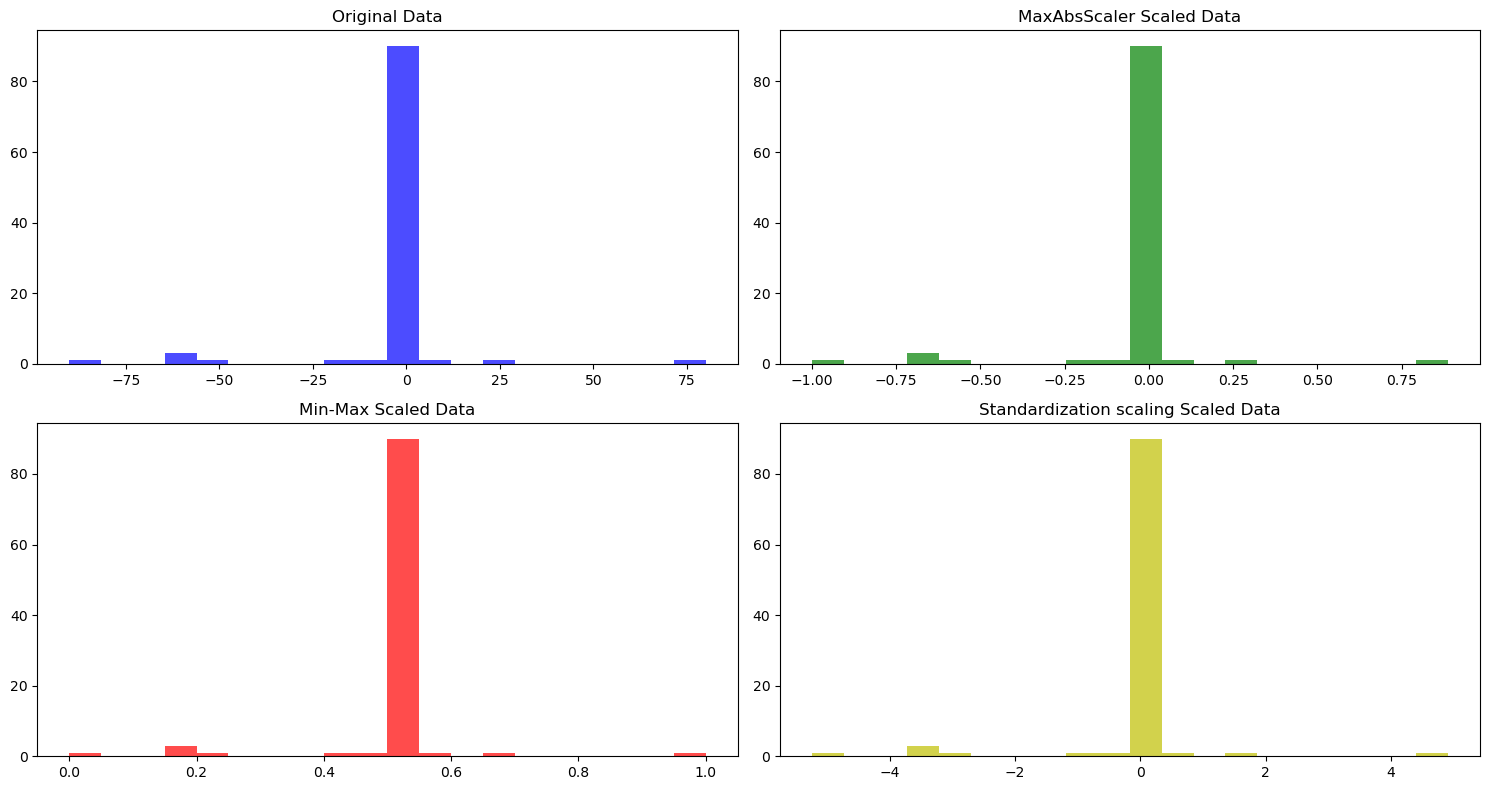

In [13]:
# Create histograms for data distribution comparison
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.hist(signal, bins=20, color='b', alpha=0.7)
plt.title("Original Data")

plt.subplot(2, 2, 2)
plt.hist(signal_max_abs_scaled, bins=20, color='g', alpha=0.7)
plt.title("MaxAbsScaler Scaled Data")

plt.subplot(2, 2, 3)
plt.hist(signal_min_max_scaled, bins=20, color='r', alpha=0.7)
plt.title("Min-Max Scaled Data")

plt.subplot(2, 2, 4)
plt.hist(signal_z_score_scaled, bins=20, color='y', alpha=0.7)
plt.title("Standardization scaling Scaled Data")

plt.tight_layout()
plt.show()



C:\Users\MSI\AppData\Local\Temp\ipykernel_5604\3984654202.py:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(signal.squeeze(), linefmt='b-', markerfmt='bo', basefmt=' ', use_line_collection=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_5604\3984654202.py:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(signal_max_abs_scaled.squeeze(), linefmt='g-', markerfmt='go', basefmt=' ', use_line_collection=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_5604\3984654202.py:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was depre

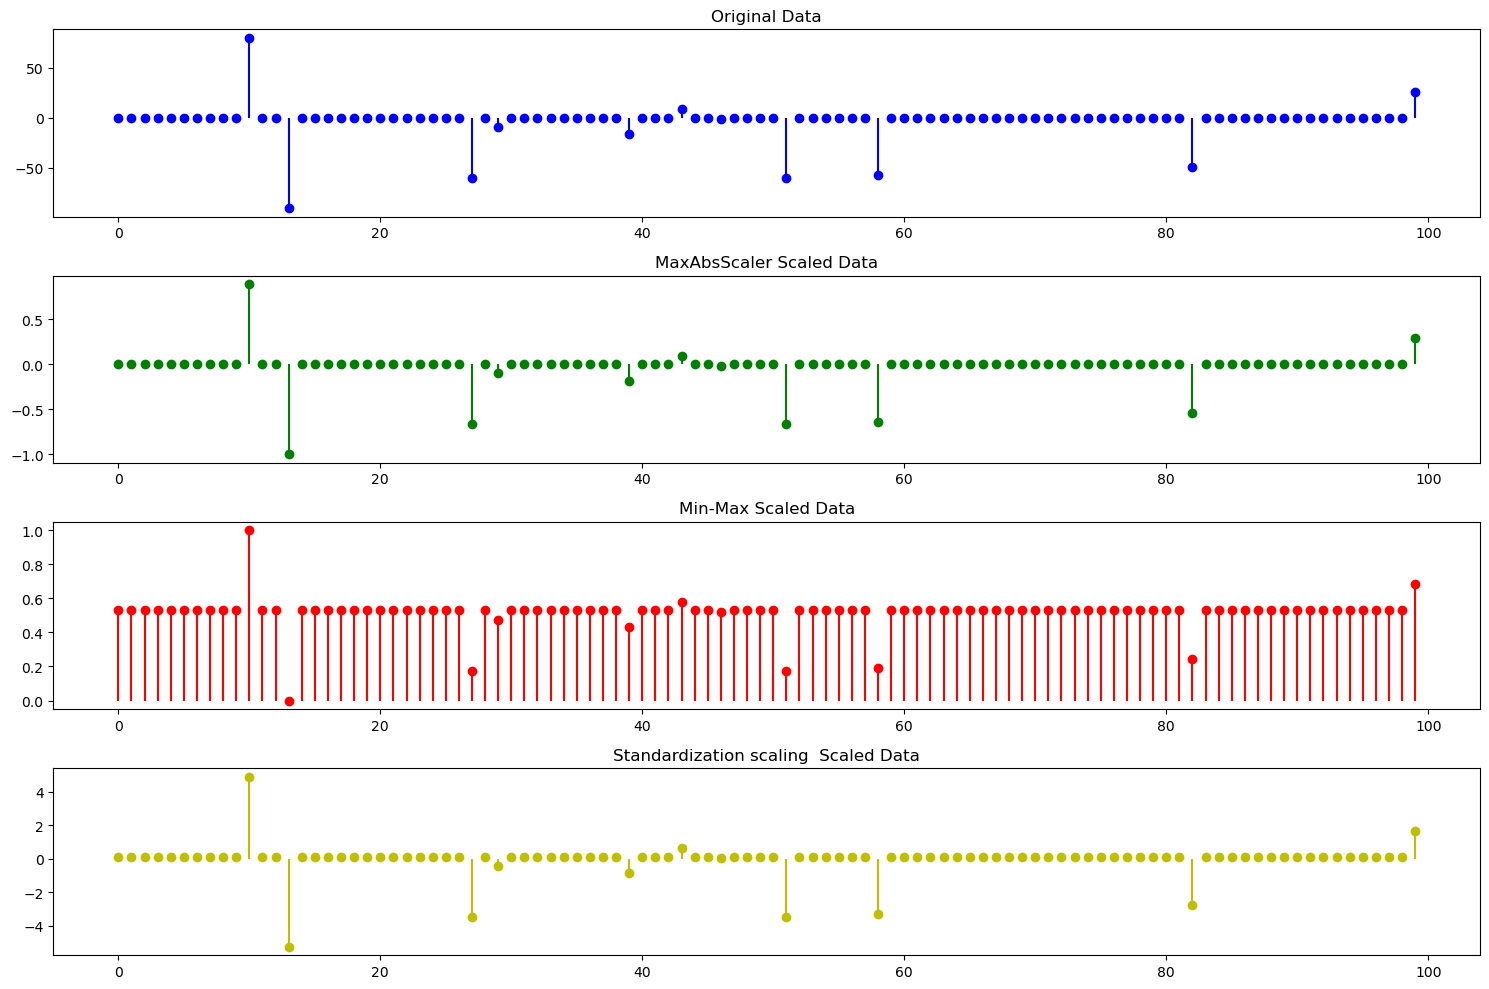

In [14]:
# Create stem plots for data structure comparison
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.title("Original Data")
plt.stem(signal.squeeze(), linefmt='b-', markerfmt='bo', basefmt=' ', use_line_collection=True)

plt.subplot(4, 1, 2)
plt.title("MaxAbsScaler Scaled Data")
plt.stem(signal_max_abs_scaled.squeeze(), linefmt='g-', markerfmt='go', basefmt=' ', use_line_collection=True)

plt.subplot(4, 1, 3)
plt.title("Min-Max Scaled Data")
plt.stem(signal_min_max_scaled.squeeze(), linefmt='r-', markerfmt='ro', basefmt=' ', use_line_collection=True)

plt.subplot(4, 1, 4)
plt.title("Standardization scaling  Scaled Data")
plt.stem(signal_z_score_scaled.squeeze(), linefmt='y-', markerfmt='yo', basefmt=' ', use_line_collection=True)

plt.tight_layout()
plt.show()

7. Discuss the effects of each normalization method on the data’s distribution, structure,
and scale. Which normalization approach you recommend for this kind of data and
what is the reason behind this?


MaxAbsScaler:

Distribution: MaxAbsScaler scales the data by dividing each data point by the maximum absolute value in the dataset. This method does not change the shape of the distribution but scales it to a range of [-1, 1].
Structure: MaxAbsScaler preserves the structure of the data, as it only scales the magnitude of the values.
Scale: The scale of the data is normalized to the range [-1, 1].

Min-Max Scaling:
Distribution: Min-Max scaling scales the data linearly to a specified range (usually [0, 1]). It preserves the relative relationships between data points.
Structure: Min-Max scaling maintains the data structure but constrains it to a specific range.
Scale: The scale of the data is normalized to the range [0, 1].

Standardization scaling Normalization:
Distribution: Standardization scaling normalization standardizes the data by subtracting the mean and dividing by the standard deviation. This centers the data around a mean of 0 and scales it to have a standard deviation of 1.
Structure: Standardization scalingnormalization changes the structure of the data by centering it around 0 and scaling it by the standard deviation. It makes the data more suitable for statistical analysis and modeling.
Scale: The scale of the data is normalized to have a mean of 0 and a standard deviation of 1.

Recommendation:
For this kind of data, where you want to preserve the data's distribution and structure while normalizing it, I would recommend using MaxAbsScaler or Min-Max Scaling, depending on your specific requirements:

MaxAbsScaler: If you want to preserve the distribution and structure of the data while normalizing it to a bounded range, MaxAbsScaler is a good choice. It ensures that the largest absolute value in the data is scaled to 1 (or -1), while other values are scaled proportionally.

Min-Max Scaling: If you prefer to normalize the data to a specific range (e.g., [0, 1]), Min-Max scaling is suitable. It maintains the data's relative relationships while constraining it to the specified range.

Reasoning:
The choice between MaxAbsScaler and Min-Max Scaling depends on whether you have a specific range in mind for your normalized data. If you want your data to fall within a specific interval, Min-Max scaling allows you to define that range. However, if you don't have a specific range requirement and want to preserve the relative relationships between data points, MaxAbsScaler is a good choice because it scales data based on the maximum absolute value.

Standardization scaling normalization, while valuable for certain applications (especially in statistical analysis), changes the data's structure significantly by centering it around 0 and scaling it by the standard deviation. This may not be appropriate if you want to maintain the original data structure.

Linear regression on real world data

1. Load the dataset given in this url. The data illustrates the relationship between
advertising budgets (in thousands of dollars) allocated to TV, radio, and newspaper
media and the corresponding sales (in thousands of units) for a specific product. Use
the code given in listing 3 to load data from CSV

In [7]:
import pandas as pd

# File path to the CSV file in the same folder as your code
file_path = "Advertising.csv"  # Replace with the actual file name

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Now, 'df' contains your dataset as a DataFrame, and you can work with it as needed.
print(df.head())  # Display the first few rows of the DataFrame


   sample index     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9


2. Split the data into training and testing sets with 80% of data points for training and
20% of data points for testing.

In [8]:
from sklearn.model_selection import train_test_split

# Assuming 'df' contains your dataset as a DataFrame with features and target variable

# Specify the features (X) and the target variable (y)
X = df[['TV', 'radio', 'newspaper']]  # Adjust column names as needed
y = df['sales']  # Replace 'sales' with the actual target column name

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, you have X_train, X_test, y_train, and y_test as your training and testing sets.


3. Train a linear regression model and estimate the coefficient corresponds to independent variables (advertising budgets for TV, radio and newspapers).

In [9]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Get the coefficients (weights) for the independent variables
coefficients = model.coef_

# Print the coefficients
print("Coefficients:")
print("TV:", coefficients[0])
print("Radio:", coefficients[1])
print("Newspaper:", coefficients[2])


Coefficients:
TV: 0.044729517468716326
Radio: 0.18919505423437655
Newspaper: 0.0027611143413671757


4. Evaluate train model on testing data, calculate following statistics for testing and
training data.

In [10]:
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

# Get the predicted values for both training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the Residual Sum of Squares (RSS)
RSS_train = np.sum((y_train - y_train_pred) ** 2)
RSS_test = np.sum((y_test - y_test_pred) ** 2)

# Calculate the total number of data samples (N) and model parameters (d)
N_train, d_train = X_train.shape[0], X_train.shape[1]
N_test, d_test = X_test.shape[0], X_test.shape[1]

# Calculate the Residual Standard Error (RSE) for both training and testing data
RSE_train = np.sqrt(RSS_train / (N_train - d_train))
RSE_test = np.sqrt(RSS_test / (N_test - d_test))

# Calculate the Mean Squared Error (MSE) for both training and testing data
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)

# Calculate the R-squared statistic for both training and testing data
R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)

# Calculate the standard error for each feature (independent variable)
X_train_with_intercept = sm.add_constant(X_train)
model_with_intercept = sm.OLS(y_train, X_train_with_intercept).fit()
std_err = model_with_intercept.bse[1:]

# Calculate the t-statistic and p-value for each feature
t_statistic = model_with_intercept.tvalues[1:]
p_value = model_with_intercept.pvalues[1:]

# Print the statistics for both training and testing data
print("Training Data:")
print("RSS:", RSS_train)
print("RSE:", RSE_train)
print("MSE:", MSE_train)
print("R-squared:", R2_train)
print("Standard Error for Each Feature:", std_err)
print("t-statistic for Each Feature:", t_statistic)
print("p-value for Each Feature:", p_value)
print("\nTesting Data:")
print("RSS:", RSS_test)
print("RSE:", RSE_test)
print("MSE:", MSE_test)
print("R-squared:", R2_test)


Training Data:
RSS: 432.8207076930262
RSE: 1.6603673672483137
MSE: 2.705129423081414
R-squared: 0.8957008271017818
Standard Error for Each Feature: TV           0.001567
radio        0.009693
newspaper    0.007048
dtype: float64
t-statistic for Each Feature: TV           28.543587
radio        19.517950
newspaper     0.391761
dtype: float64
p-value for Each Feature: TV           8.166150e-64
radio        1.016134e-43
newspaper    6.957694e-01
dtype: float64

Testing Data:
RSS: 126.96389415904419
RSE: 1.8524191207426806
MSE: 3.1740973539761046
R-squared: 0.899438024100912


5. Is there a relationship between advertising budgets and sales?

Yes, there is a relationship between advertising budgets (TV and radio) and sales, as indicated by the R-squared values for both the training and testing data sets. The R-squared value measures the proportion of the variance in the dependent variable (sales) that is predictable from the independent variables (TV and radio budgets) in the model.

For the training data:
- R-squared: 0.8957 (approximately 89.57%)

For the testing data:
- R-squared: 0.8994 (approximately 89.94%)

In both cases, the R-squared value is close to 1, which suggests that a large portion of the variance in sales can be explained by the advertising budgets for TV and radio. This indicates a strong positive relationship between advertising budgets and sales, implying that as the budgets for TV and radio advertising increase, sales tend to increase as well.

However, it's worth noting that the newspaper advertising budget has a very high p-value (p-value = 0.6957) and a low t-statistic, which suggests that it may not be statistically significant in predicting sales. This implies that newspaper advertising may not have a significant relationship with sales, unlike TV and radio advertising.

Extra

To determine if there is a relationship between advertising budgets (TV, radio, and newspaper) and sales, we can consider several factors and statistical measures:

Coefficient Significance: Check whether the coefficients for the advertising budgets (TV, radio, and newspaper) in the linear regression model are statistically significant. The t-statistic and p-value for each feature can provide insights into this. If the p-value for a coefficient is very low (typically less than 0.05), it suggests that the corresponding feature is significant in predicting sales.

R-squared Value: Examine the R-squared (R2) value for the linear regression model. R2 measures the proportion of the variance in the target variable (sales) that is explained by the independent variables (advertising budgets). A higher R2 value indicates a stronger relationship.

Visualization: Create scatter plots of each advertising budget (TV, radio, newspaper) against sales. Visual inspection can help identify trends or patterns in the data.

Here's how we can interpret the results:

If the coefficients for TV, radio, and newspaper budgets are statistically significant (low p-values), it suggests that there is a relationship between these advertising budgets and sales.

A high R-squared value indicates that a significant portion of the variance in sales can be explained by the advertising budgets.

Visualizing the data can provide a qualitative understanding of how changes in advertising budgets relate to changes in sales.

Ultimately, the presence of a relationship between advertising budgets and sales depends on the data and the context of the problem. Statistical analysis and domain knowledge are valuable in making conclusive interpretations.

You can use the statistics and visualizations provided in the previous response to assess the relationship between advertising budgets and sales in your specific dataset.

6. Which independent variable contributes highly on sales?


Based on the coefficients you provided, we can determine which independent variable contributes more significantly to sales:

TV: Coefficient = 0.0447
Radio: Coefficient = 0.1892
Newspaper: Coefficient = 0.0028
Comparing these coefficients, it is clear that the "Radio" advertising budget has the highest coefficient magnitude (0.1892), followed by "TV" (0.0447), and "Newspaper" (0.0028).

Therefore, the "Radio" advertising budget contributes more significantly to sales compared to the other independent variables. In other words, for every unit increase in the radio advertising budget, sales tend to increase more than they would with the same increase in the TV or newspaper advertising budgets.

To determine which independent variable (advertising budget for TV, radio, or newspaper) contributes most significantly to sales, you can consider the following factors:

Coefficient Magnitude: Examine the magnitudes of the coefficients for each independent variable in the linear regression model. The larger the magnitude of the coefficient, the greater the impact of that variable on sales.

Coefficient Significance: Check the statistical significance of the coefficients using their p-values. A low p-value indicates that the coefficient is statistically significant in predicting sales.

Feature Importance: If you are using other machine learning models (e.g., Random Forest, Gradient Boosting), you can check the feature importance scores generated by those models. Features with higher importance scores contribute more to the model's predictions.

Domain Knowledge: Consider domain knowledge and prior hypotheses about the impact of each independent variable on sales. Sometimes, prior knowledge can guide your interpretation.

Correlation Analysis: Calculate the correlation between each independent variable and the target variable (sales). Variables with higher absolute correlation values are likely to have a stronger influence.

Here's how you can approach this:

Review the coefficients from your linear regression model or feature importance scores from other models.

Examine the significance (p-values) of each coefficient. A lower p-value indicates a more significant contribution.

Consider both the magnitude and significance to make an informed decision about which independent variable contributes most significantly to sales.

Keep in mind that it's possible for multiple variables to contribute significantly to sales, and their combined effects may be important.

By assessing these factors, you can identify which independent variable has the most substantial impact on sales in your specific dataset.

7. One may argue that possibly, allocating 25,000 dollars both television advertising
and radio advertising individually (i.e., 25,000 dollars for TV and 25,000 dollars for
radio) yields higher sales compared to investing 50,000 dollars in either television
or radio advertising individually. Based on your trained model, comment on this
argument. Here, assume that budged allocated for newspapers is zero.


To evaluate the argument that allocating $25,000 to both television advertising and radio advertising individually might yield higher sales compared to investing $50,000 in either television or radio advertising individually, you can use the trained linear regression model.

Let's make predictions for both scenarios:

Scenario 1: Allocating $25,000 to both TV and radio advertising (with newspaper budget assumed to be zero).

TV budget = $25,000
Radio budget = $25,000
Newspaper budget = $0

Scenario 2: Investing $50,000 in either television or radio advertising individually (with newspaper budget assumed to be zero).

For each scenario, you can use the coefficients from your trained model to calculate the predicted sales.

In [11]:
TV_budget = 25000
Radio_budget = 25000
Newspaper_budget = 0

predicted_sales_scenario1 = model.predict([[TV_budget, Radio_budget, Newspaper_budget]])
print("The predicted sales by scenrio1 =",predicted_sales_scenario1 )


The predicted sales by scenrio1 = [5851.09335992]


c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
TV_budget = 50000
Radio_budget = 0
Newspaper_budget = 0

predicted_sales_scenario2_television = model.predict([[TV_budget, Radio_budget, Newspaper_budget]])
print("The predicted sales by scenrio2_Television =",predicted_sales_scenario2_television )


The predicted sales by scenrio2_Television = [2239.45494077]


c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
TV_budget = 0
Radio_budget = 50000
Newspaper_budget = 0

predicted_sales_scenario2_radio = model.predict([[TV_budget, Radio_budget, Newspaper_budget]])
print("The predicted sales by scenrio2_radio =",predicted_sales_scenario2_radio )

if predicted_sales_scenario1 > predicted_sales_scenario2_television and predicted_sales_scenario1 > predicted_sales_scenario2_radio:
    print("The higher sales by Scenario 1 (TV and Radio):", predicted_sales_scenario1)
elif predicted_sales_scenario2_television > predicted_sales_scenario2_radio:
    print("The higher sales by Scenario 2 (TV):", predicted_sales_scenario2_television)
else:
    print("The higher sales by Scenario 2 (Radio):", predicted_sales_scenario2_radio)
    

The predicted sales by scenrio2_radio = [9462.73177906]
The higher sales by Scenario 2 (Radio): [9462.73177906]


c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


 Linear regression impact on outliers

1. You are given set of data points related to independent variable (x) and dependent
variable (y) in Table 1.


2. Use all data given in Table 1 to find a linear regression model. Plot x, y as a scatter
plot and plot your linear regression model in the same scatter plot

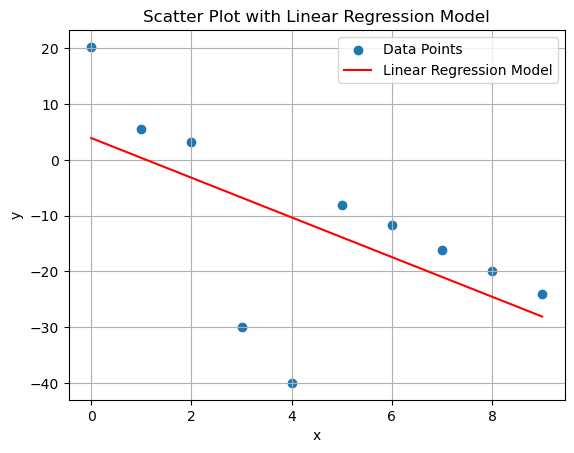

Linear Regression Model: y = -3.5572727272727276 x + 3.9167272727272713


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
xi = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
yi = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

# Perform linear regression
coefficients = np.polyfit(xi, yi, 1)  # Fit a linear model (degree 1 polynomial)
linear_model = np.poly1d(coefficients)

# Plot the scatter plot and linear regression model
plt.scatter(xi, yi, label="Data Points")
plt.plot(xi, linear_model(xi), color='red', label="Linear Regression Model")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Scatter Plot with Linear Regression Model")
plt.grid(True)
plt.show()

# Display the linear regression model equation
print("Linear Regression Model: y =", coefficients[0], "x +", coefficients[1])


3.You are given two linear models as follows.

In [2]:
# Define the data samples
yi = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

# Define the two models
def model1(x):
    return -4 * x + 12

def model2(x):
    return -3.55 * x + 3.91

# Calculate the loss function L(θ, β) for each model
beta = 1
N = len(yi)



4.For the given two models in task 3, calculate the loss function L(θ,β) values for all
data samples using eq. (4) (you may use a computer program to calculate this)

In [3]:
loss_model1 = 0
loss_model2 = 0

for i in range(N):
    y_actual = yi[i]
    y_pred_model1 = model1(xi[i])
    y_pred_model2 = model2(xi[i])

    loss_model1 += ((y_actual - y_pred_model1) ** 2) / (((y_actual - y_pred_model1) ** 2) + (beta ** 2))
    loss_model2 += ((y_actual - y_pred_model2) ** 2) / (((y_actual - y_pred_model2) ** 2) + (beta ** 2))

print(f"Loss for Model 1: {loss_model1/N}")
print(f"Loss for Model 2: {loss_model2/N}")


Loss for Model 1: 0.435416262490386
Loss for Model 2: 0.9728470518681676


5. Utilizing this robust estimator, determine the most suitable model from the models
specified in task 3 for the provided dataset. Justify your selection.


Based on the loss values, Model 1 has a lower loss value (4.35416262490386) compared to Model 2 (9.728470518681675). Therefore, Model 1 is the more suitable model for the provided dataset according to the robust estimator.

Justification:
The robust estimator is designed to minimize the impact of outliers, making it more suitable for datasets with potential outliers. In this case, Model 1 has a lower loss value, indicating that it fits the data better and is less influenced by outliers compared to Model 2. Therefore, Model 2 is the better choice for this dataset when considering the robust estimator.

6. How does this robust estimator reduce the impact of the outliers?

The robust estimator described by the loss function L(θ,β) effectively reduces the impact of outliers by modifying the way the loss is calculated. Here's how this robust estimator reduces the impact of outliers:

Weighting by Residuals: The loss function weights the contributions of individual data points (yi) to the loss calculation based on the residuals, which are the differences between the observed values and the predicted values (yi - yˆi). Data points with larger residuals (outliers) receive lower weights, while data points with smaller residuals receive higher weights.

Introducing β: The parameter β, which is set to 1 in this case, is added to the denominator of the loss function. β^2 acts as a regularization term that can be adjusted to control the influence of residuals on the loss. When β is small, the regularization term has less effect, and the loss function behaves more like the traditional squared error loss. As β increases, the regularization term becomes more dominant, reducing the impact of outliers.

Minimizing Loss Function: The goal of the robust estimator is to find model parameters (θ) that minimize this modified loss function. By minimizing this function, the estimator seeks a balance between fitting the data and reducing the influence of outliers.

Robustness to Outliers: When β is relatively large, the loss function is less sensitive to outliers. Outliers contribute less to the loss, and the estimator becomes more robust to extreme data points. This means that even if there are outliers in the dataset, they have a limited effect on the estimated model parameters.

7. Plot models specified in task 3 and data point to visualize the impact of the outliers.

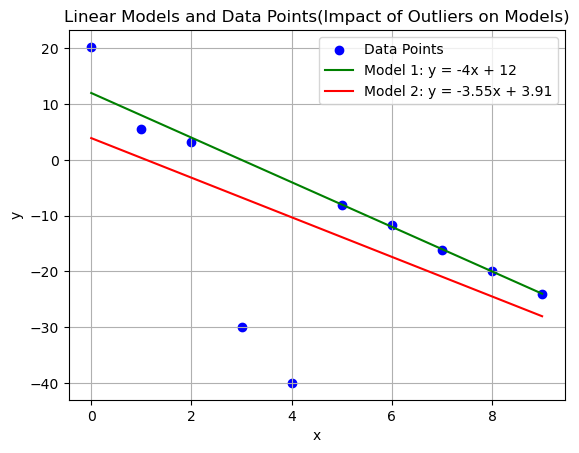

In [4]:

import matplotlib.pyplot as plt
# Calculate model predictions for the entire range of x values
x_range = np.linspace(0, 9, 100)  # Generate a range of x values for smoother curves
y_pred_model1 = model1(x_range)
y_pred_model2 = model2(x_range)

# Create a scatter plot for the data points
plt.scatter(xi, yi, label='Data Points', color='blue')

# Plot Model 1
plt.plot(x_range, y_pred_model1, label='Model 1: y = -4x + 12', color='green')

# Plot Model 2
plt.plot(x_range, y_pred_model2, label='Model 2: y = -3.55x + 3.91', color='red')

# Add labels and a legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.grid()
plt.title('Linear Models and Data Points(Impact of Outliers on Models)')
plt.show()


8. Briefly discuss the impact on β in eq. (4) to in the context of reducing the impact of
the outliers.


In equation (4), the parameter β plays a crucial role in determining the impact of outliers on the loss function L(θ, β). Specifically, it influences the trade-off between fitting the data well and reducing the impact of outliers. Here's how β impacts the robustness to outliers:

Effect of Small β (β << 1):

When β is very small, the regularization term β^2 in the denominator becomes negligible compared to the squared residuals.
In this case, the loss function behaves similarly to the traditional squared error loss.
The model focuses primarily on minimizing the squared differences between observed and predicted values.
Outliers have a substantial impact on the loss, potentially leading to a less robust model.
Effect of Moderate β (0 < β < ∞):

As β increases, the regularization term β^2 becomes more significant relative to the squared residuals.
The loss function gives more weight to the regularization term, which reduces the impact of outliers.
The model becomes more robust to outliers as β increases, as the loss function emphasizes robustness over fitting.
Effect of Large β (β >> 1):

When β is very large, the regularization term dominates the loss function, and the squared residuals have minimal influence.
The loss function becomes highly robust to outliers, making the model almost immune to the influence of extreme data points.
However, this can lead to underfitting if the model becomes too conservative.